# Chapter 12: Estimation of Linear Models
# Use case: Profit Forecasting using Linear Regression
# =======================
Dataset: https://www.kaggle.com/datasets/farhanmd29/50-startups

First we load the packages we will use

In [52]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# Package for charting
import matplotlib.pyplot as plt
import seaborn as sns #charts

# package for timing runtime
import time

# package for navigating the operating system
import os

Load in CSV data: Let us start by loading all the data

In [53]:
loc = "50_Startups.csv"
start_time = time.time()

# deal with datetime in the csv...
mydateparser = lambda x: pd.datetime.strptime(x, 'm%/d%/y%')
# Upload
df = pd.read_csv(loc, header=0) # Note that we are loading in the csv not specifying an index, df will have an identity index
df.fillna(0)

print("It took %s seconds to load the .csv file." % (time.time() - start_time))

It took 0.005009889602661133 seconds to load the .csv file.


In [54]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


We are looking at a simple dataset from startups in New York, California and Florida about 50 business Startups "17 in each state". In the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

## Use Categorical Variable: State ... on hot encodings

For each state in the columns State, we will create a new column of {1,0}. If a row has the entry "Florida" int he State column, the new columns calle Florida we will create will have a 1. If not, a 0.

In [58]:
#We need to set the datatype as a category before we get_dummies
df['State'] = df['State'].astype('category')

In [59]:
#One hot encodings
# get a {1,0} flag to label whether a row has a value of "California" 
one_hot_encodings_for_state = pd.get_dummies(df['State'])   

#Join the new one hot encodings to the main df 
df = df.join(one_hot_encodings_for_state) 

In [60]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


## Linear model of Profit (No categorical variables used)

Separate the companies we will learn the linear model for and the 3 companies that we will assess

In [61]:
# Test df is randomly taken 3 rows...
df_test = df.sample(n=3)

# Training df is the rest
df_train = df[(df.index.isin(df_test) == False)]

Stats packge we will be using

In [62]:
#Key library we will use for the linear models is...
import statsmodels.api as sm

In [63]:
# Instantiate an OLS model from statsmodels 
lm = sm.OLS(df_train['Profit'], df_train[['R&D Spend', 'Administration','Marketing Spend']])   

# Now fit the OLS model... 
model = lm.fit()   

#Get the summary stats of the regression model 
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Sun, 14 Aug 2022   Prob (F-statistic):                    1.17e-44
Time:                        11:44:00   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7180      0.065     11.047      0.000       0.587       0.849
Administration      0.3277      0.031     10.458      0.000       0.265       0.391
Marketing Spend     0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         9.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

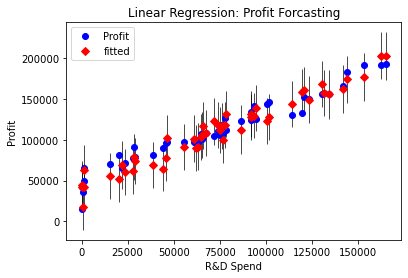

<Figure size 720x720 with 0 Axes>

In [64]:
# Regression plot 
fig, ax = plt.subplots() 
fig = sm.graphics.plot_fit(model, 0, ax=ax)  

# Set the figure size 
plt.figure(figsize=(10, 10)) 

ax.set_ylabel("Profit")
ax.set_xlabel("R&D Spend") 
ax.set_title("Linear Regression: Profit Forcasting") 

plt.show() 

## Linear model of Profit (categorical variables used as one hot encodings)

In [65]:
# Instantiate an OLS model from statsmodels 
lm = sm.OLS(df_train['Profit'], df_train[['R&D Spend','Administration','Marketing Spend','California','Florida','New York']])   

# Now fit the OLS model... 
model = lm.fit()   

#Get the summary stats of the regression model 
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.34e-27
Time:                        11:44:01   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
California       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
Florida          5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
New York         5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

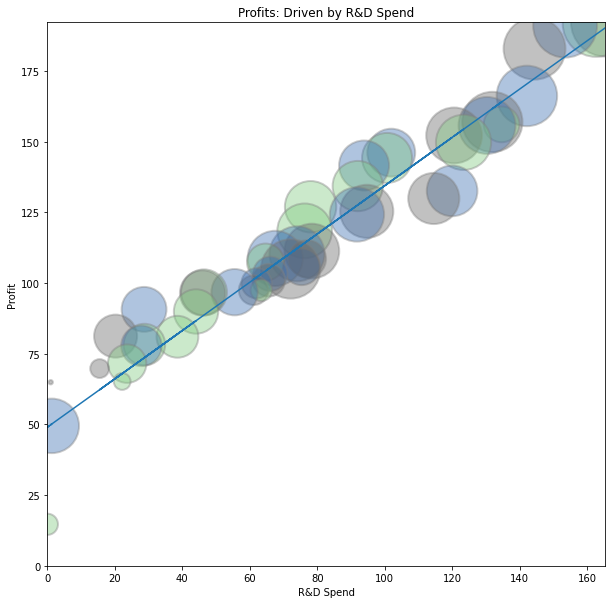

In [106]:
# Function... plots bubble for the startup dataset 
def bubble_startup_profits(df: pd.DataFrame, max_x: float = 0, max_y: float = 0): 

    # Set the figure size
    plt.figure(figsize=(10, 10))   

    #Scatter... size down some of the columns of data to get a good look to the chart     
    plt.scatter(df['R&D Spend']/1000, df['Profit']/1000, s=df['Marketing Spend']/100, c=df['State'].cat.codes, cmap="Accent", alpha=0.4, edgecolors="grey", linewidth=2) 

    # Add titles (main and on axis) 
    plt.xlabel("R&D Spend") 
    plt.ylabel("Profit")    
    
    #Axis Scaling... 
    if(max_x==0): 
        max_x = df['R&D Spend'].max() /1000
    else:
        max_x = max_x /1000
    
    if(max_y==0): 
        max_y = df['Profit'].max() /1000
    else:
        max_y = max_y /1000
        
    plt.xlim(left=0, right=max_x) 
    plt.ylim(bottom=0, top=max_y) 
    plt.title("Profits: Driven by R&D Spend")      

    #Interpolation line.... 
    lm = sm.OLS(df['Profit']/1000, sm.add_constant(df['R&D Spend']/1000)).fit() 
    plt.plot(df['R&D Spend']/1000, df['R&D Spend']/1000 * lm.params[1] + lm.params[0])      

    # Show the graph 
    plt.show()      

#Run func
bubble_startup_profits(df_train, df['R&D Spend'].max(), df['Profit'].max()) 

In [107]:
df['R&D Spend'].max()

165349.2

Profit forecast for our three new examples


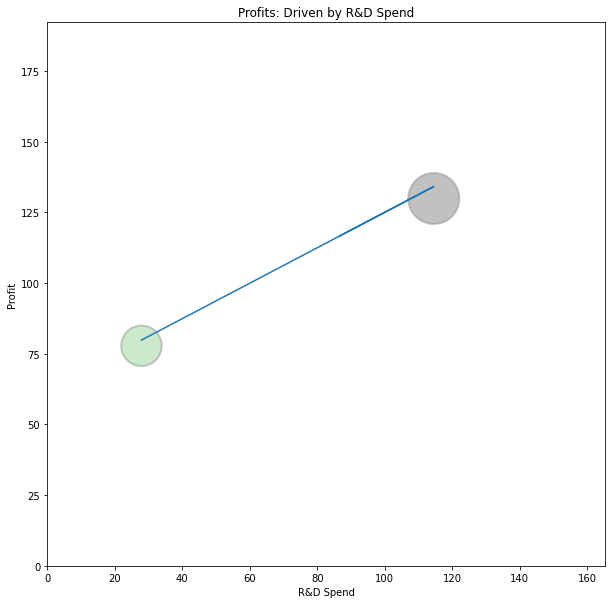

In [110]:
#Run for our 3 examples we are assessing
print('Profit forecast for our three new examples')
bubble_startup_profits(df_test, df['R&D Spend'].max(), df['Profit'].max()) 

In [111]:
df_test

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
19,86419.70,153514.11,0.00,New York,122776.86,0,0,1
15,114523.61,122616.84,261776.23,New York,129917.04,0,0,1
41,27892.92,84710.77,164470.71,Florida,77798.83,0,1,0
